In [1]:
import requests
import pandas as pd

In [2]:
r = requests.get('https://api.nasa.gov/neo/rest/v1/neo/browse/?api_key=DEMO_KEY')

In [3]:
r.status_code

200

Códigos de retorno más comunes de HTTP:

200: La solicitud se realizó correctamente y el servidor devolvió los datos solicitados.

201 (Creado): La solicitud se realizó correctamente y el servidor creó un nuevo recurso.

204 (Sin contenido): La solicitud se realizó correctamente, pero no hay contenido que devolver.

4xx (Error del cliente): Indica que se produjo un error en el lado del cliente.

400 (Solicitud incorrecta): La solicitud es inválida y no puede ser procesada por el servidor.
...

5xx (Error del servidor): Indica que se produjo un error en el lado del servidor.

500 (Error interno del servidor): El servidor encontró un error interno durante el procesamiento de la solicitud.

In [4]:
url = "https://api.nasa.gov/neo/rest/v1/neo/browse/"
mi_key = {'api_key': '6Va0uyd5tLUm89J4pqbnKWhk9iZYeRfseEMkzdBP'}

response = requests.get(url, params=mi_key)

response.status_code

200

In [5]:
url = "https://api.nasa.gov/neo/rest/v1/neo/browse/"
mis_params = {'api_key': '6Va0uyd5tLUm89J4pqbnKWhk9iZYeRfseEMkzdBP',
             'start_date': '2023-04-01',
             'end_date': '2023-04-30'}

r2 = requests.get(url, params = mis_params)

r2.status_code

200

In [6]:
dict_data = r2.json()

In [7]:
dict_data.keys()

dict_keys(['links', 'page', 'near_earth_objects'])

In [8]:
data = dict_data['near_earth_objects']

In [9]:
# pd.json_normalize : Normalize semi-structured JSON data into a flat table.
# https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

df = pd.json_normalize(data)
df.head(3)

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,orbital_data.perihelion_distance,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_description,orbital_data.orbit_class.orbit_class_range
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.31,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,1.133284372081002,178.9269951795186,1.782973900121676,2459802.601698595905,110.7776526746434,.5597706088868498,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,1.194521858788897,156.2503681890173,4.079828796226027,2459956.023234763085,10.23596428095426,.2301418330768929,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.83,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,1.061321201278226,350.4750169387657,3.883609286075629,2460678.792844248905,188.0405622650862,.2535179888641312,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU


In [10]:
df.shape


(20, 44)

In [11]:
df.columns

Index(['id', 'neo_reference_id', 'name', 'name_limited', 'designation',
       'nasa_jpl_url', 'absolute_magnitude_h',
       'is_potentially_hazardous_asteroid', 'close_approach_data',
       'is_sentry_object', 'links.self',
       'estimated_diameter.kilometers.estimated_diameter_min',
       'estimated_diameter.kilometers.estimated_diameter_max',
       'estimated_diameter.meters.estimated_diameter_min',
       'estimated_diameter.meters.estimated_diameter_max',
       'estimated_diameter.miles.estimated_diameter_min',
       'estimated_diameter.miles.estimated_diameter_max',
       'estimated_diameter.feet.estimated_diameter_min',
       'estimated_diameter.feet.estimated_diameter_max',
       'orbital_data.orbit_id', 'orbital_data.orbit_determination_date',
       'orbital_data.first_observation_date',
       'orbital_data.last_observation_date', 'orbital_data.data_arc_in_days',
       'orbital_data.observations_used', 'orbital_data.orbit_uncertainty',
       'orbital_data.minimu

<AxesSubplot:>

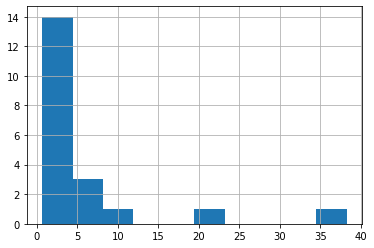

In [12]:
df['estimated_diameter.kilometers.estimated_diameter_min'].hist()

In [13]:
import requests
import pandas as pd

In [14]:
url = 'https://en.wikipedia.org/w/api.php?action=query&format=json&titles=Xoloitzcuintle&prop=extracts'

request_wiki = requests.get(url)

request_wiki.status_code



200

In [15]:
request_wiki.json().keys()

dict_keys(['batchcomplete', 'warnings', 'query'])

In [16]:
request_wiki.json()['query'].keys()

dict_keys(['pages'])

In [17]:
request_wiki.json()['query']['pages'].keys()

dict_keys(['243549'])

In [18]:
request_wiki.json()['query']['pages']['243549'].keys()

dict_keys(['pageid', 'ns', 'title', 'extract'])

In [19]:
df = pd.json_normalize(request_wiki.json()['query'])

In [20]:
df = pd.json_normalize(request_wiki.json()['query']['pages']['243549'])
df

,pageid,ns,title,extract
0,243549,0,Xoloitzcuintle,<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzqui...


In [21]:
buscar_titulo = 'Xoloitzcuintle'
 
#endpoint = 'https://es.wikipedia.org/w/api.php'
endpoint = 'https://en.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'titles' : buscar_titulo, 
            'prop' : 'extracts'
        }

request2_wiki = requests.get(endpoint, params=params)

request2_wiki.status_code

200

In [22]:
df = pd.json_normalize(request2_wiki.json()['query'])
#df['pages.243549.extract'][0]

In [23]:
buscar_titulo = 'Xoloitzcuintle'
 
#endpoint = 'https://es.wikipedia.org/w/api.php'
endpoint = 'https://en.wikipedia.org/w/api.php'


params = {
            'action' : 'query',
            'format' : 'json',
            'titles' : buscar_titulo, 
            'prop' : 'extracts',
            'exintro': True,
            'explaintext': True
        }

request3_wiki = requests.get(endpoint, params=params)

request3_wiki.status_code

200

In [24]:
df = pd.json_normalize(request3_wiki.json()['query'])
resumen_xolo = df['pages.243549.extract'][0]

In [25]:
df

,pages.243549.pageid,pages.243549.ns,pages.243549.title,pages.243549.extract
0,243549,0,Xoloitzcuintle,"The Xoloitzcuintle (or Xoloitzquintle, Xoloitz..."


In [26]:
resumen_xolo

"The Xoloitzcuintle (or Xoloitzquintle, Xoloitzcuintli, or Xolo) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the Perro pelón mexicano or Mexican hairless dog. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is xōlōitzcuintli [ʃoːloːit͡sˈkʷint͡ɬi] (singular) and xōlōitzcuintin [ʃoːloːit͡sˈkʷintin] (plural). The name comes from the god Xolotl that, according to ancient narratives, is its creator and itzcuīntli [it͡sˈkʷiːnt͡ɬi], meaning 'dog' in the Nahuatl language.\n\n"

In [27]:
buscar_en_titulo = 'Leon'
 
endpoint = 'https://es.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'list':'search',
            'srsearch' : buscar_en_titulo
        }

request4_wiki = requests.get(endpoint, params=params)

request4_wiki.status_code

200

In [28]:
df = pd.json_normalize(request4_wiki.json()['query']['search'])
df

,ns,title,pageid,size,wordcount,snippet,timestamp
0,0,Panthera leo,25116,146793,17903,"El <span class=""searchmatch"">león</span> (Pant...",2023-05-13T12:36:09Z
1,0,LEON,766618,1824,161,"<span class=""searchmatch"">LEON</span> es un nú...",2022-12-13T14:18:14Z
2,0,Léon,232172,31324,3716,"<span class=""searchmatch"">Léon</span>, también...",2023-03-04T18:05:25Z
3,0,León (España),3341,233782,25540,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-26T19:37:44Z
4,0,León (heráldica),1743552,18355,949,"En Heráldica el <span class=""searchmatch"">León...",2023-05-01T17:22:17Z
5,0,Castilla y León,485,193791,20392,"Castilla y <span class=""searchmatch"">León</spa...",2023-05-07T07:47:36Z
6,0,Nuevo León,25593,119632,9564,"Nuevo <span class=""searchmatch"">León</span> ( ...",2023-04-25T03:30:11Z
7,0,Provincia de León,23530,161746,16488,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-08T08:59:03Z
8,0,Reino de León,41339,32095,3709,"El reino de <span class=""searchmatch"">León</sp...",2023-04-27T03:14:13Z
9,0,León de Los Aldama,66887,162208,20499,"<span class=""searchmatch"">León</span> de los A...",2023-04-26T14:12:31Z


In [86]:
buscar_en_titulo = 'Leon'
 
endpoint = 'https://es.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'srsearch': buscar_en_titulo,
            'pageid' : '146793',
            'list':'search',
            'prop' : 'extracts',
            'exintro': True,
            'explaintext': True
        }

request4_wiki = requests.get(endpoint, params=params)

request4_wiki.status_code

200

In [87]:
df = pd.json_normalize(request4_wiki.json()['query']['search'])
df

,ns,title,pageid,size,wordcount,snippet,timestamp
0,0,Panthera leo,25116,146793,17903,"El <span class=""searchmatch"">león</span> (Pant...",2023-04-25T08:50:13Z
1,0,LEON,766618,1824,161,"<span class=""searchmatch"">LEON</span> es un nú...",2022-12-13T14:18:14Z
2,0,Léon,232172,31324,3716,"<span class=""searchmatch"">Léon</span>, también...",2023-03-04T18:05:25Z
3,0,León (España),3341,233782,25540,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-26T19:37:44Z
4,0,Castilla y León,485,194246,20428,"Castilla y <span class=""searchmatch"">León</spa...",2023-04-29T10:02:47Z
5,0,Nuevo León,25593,119632,9564,"Nuevo <span class=""searchmatch"">León</span> ( ...",2023-04-25T03:30:11Z
6,0,León (heráldica),1743552,18355,949,"En Heráldica el <span class=""searchmatch"">León...",2023-05-01T17:22:17Z
7,0,Reino de León,41339,32095,3709,"El reino de <span class=""searchmatch"">León</sp...",2023-04-27T03:14:13Z
8,0,Provincia de León,23530,161746,16488,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-08T08:59:03Z
9,0,León de Los Aldama,66887,162208,20499,"<span class=""searchmatch"">León</span> de los A...",2023-04-26T14:12:31Z


In [79]:
resumen = []
for i in df['snippet']:
    resumen.append(i)


In [83]:
resumen[3]

'<span class="searchmatch">León</span> (en <span class="searchmatch">leonés</span>, Llión)[7]\u200b es un municipio[8]\u200b y ciudad española en el noroeste de la península ibérica, capital de la provincia homónima, en la comunidad'

In [29]:
pip install wikipedia==1.4.0

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11689 sha256=8d2cbcb7c5da2aae3b41c929c339ee73ec1ab674ee8f33412b4c2aac057ec9b5
  Stored in directory: c:\users\yael_\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [30]:
import wikipedia

#Otra forma de hacerlo es usar el comando wikipedia.search, buscamos articulos que tengan palabra astro y nos limitamos a los primeros 20 resultados
search_results = wikipedia.search('astro', results=20)

#en la lista summaries iremos guardando los resumenes de cada articulo
summaries = []
for title in search_results:
    try:
        page = wikipedia.page(title)
        #wikipedia.page nos entrega los articulos que contienen la palabra 'title' es decir astros
        summaries.append(page.summary)
        #agregamos el resumen a la lista
    except:
        continue

for summary in summaries:
    print(summary)
    print('------------------------------------')

C:\Users\yael_\anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\yael_\anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Vance Astro, born Vance Astrovik and going by the code name Major Victory, is a superhero appearing in American comic books published by Marvel Comics. The character is usually depicted as being from the Earth-691 timeline of the Marvel Universe.
Astro first appeared in January 1969 as a founding member of the Guardians of the Galaxy in the partial reprint title Marvel Super-Heroes with issue #18.Vance Astro is a mutant who possesses a psychokinetic ability, limited to projecting concussive blasts.
------------------------------------
ASTRO 25 is the next generation of ASTRO digital two-way radio communications by Motorola Solutions.  Motorola first introduced digital two-way radio in the U.S. in 1991 under the name ASTRO Digital Solutions.With the completion of the APCO Project 25 standard, Motorola introduced the ASTRO 25 solution and migrated its ASTRO Digital Solutions customers to ASTRO 25. Project 25 (also known as P25) is a suite of standards for digital radio communications tha

In [32]:
#Haciendolo de la manera antigua
buscar_en_titulo = 'Astro'
 
endpoint = 'https://es.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'list':'search',
            'srsearch' : buscar_en_titulo
        }

request_wiki = requests.get(endpoint, params=params)

df = pd.json_normalize(request_wiki.json()['query']['search'])
df

,ns,title,pageid,size,wordcount,snippet,timestamp
0,0,Objeto astronómico,59546,9512,1001,"«<span class=""searchmatch"">Astro</span>» redir...",2023-02-27T19:24:58Z
1,0,ASTRO-E,526921,2855,270,"<span class=""searchmatch"">ASTRO</span>-E y <sp...",2021-02-11T01:00:27Z
2,0,Astro Boy (película),1713556,10854,1390,cambian el nombre de Toby por &quot;<span cla...,2023-02-01T20:43:36Z
3,0,El astro,5053299,15297,693,"El <span class=""searchmatch"">astro</span> (tít...",2023-05-01T19:49:54Z
4,0,ASTRO-B,2775932,2404,157,"<span class=""searchmatch"">ASTRO</span>-B, baut...",2021-02-22T03:31:22Z
5,0,Astro (grupo musical),7411986,9465,597,"<span class=""searchmatch"">Astro</span> (en han...",2023-05-03T01:47:46Z
6,0,Astro Girl - 1,2756472,2155,205,"planeta <span class=""searchmatch"">Astro</span>...",2022-03-03T20:30:19Z
7,0,Astro Girl - 2,2756479,1870,156,"por Delcea Mihaela Gabriela, como <span class=...",2021-09-30T19:19:21Z
8,0,ASTRO-A,2773554,2949,238,"<span class=""searchmatch"">ASTRO</span>-A, baut...",2021-02-11T01:30:03Z
9,0,Torre Astro,9601121,2344,187,"La Torre <span class=""searchmatch"">Astro</span...",2022-10-14T22:28:39Z


In [34]:
#Crear una variable con 0 o 1 que indique si el resumen contiene la palabra astros o ciencia 
search_results = wikipedia.search('astro', results=20)
#buscamos de la misma manera articulos con la palabra astro
contains_keyword = []
for title in search_results:
    try:
        page = wikipedia.page(title)
        summary = page.summary.lower()
        #pasamos todo a minuscula para que no haya problema en buscar la palabra 'astro' o 'ciencia'
        if 'astro' in summary or 'ciencia' in summary:
            #si contiene la palabra lo guardaremos en nuestra lista un 1 
            contains_keyword.append(1)
        else:
            #si no la contiene la guardaremos en la lista un 0 
            contains_keyword.append(0)
    except:
        contains_keyword.append(0)
        continue
#imprimimos los resultados ek 1 nos indica que una de las palabras cklave esta en el articulo mientras el 0 indica que no hay ninguna de las 2
for result, keyword in zip(search_results, contains_keyword):
    print(f"Artículo: {result} | Contiene Palabra Clave: {keyword}")  

Artículo: Astro | Contiene Palabra Clave: 0
Artículo: Vance Astro | Contiene Palabra Clave: 1
Artículo: Astro (Motorola) | Contiene Palabra Clave: 1
Artículo: Astro Boy | Contiene Palabra Clave: 0
Artículo: Astro (South Korean band) | Contiene Palabra Clave: 1
Artículo: Chevrolet Astro | Contiene Palabra Clave: 0
Artículo: Astro (television) | Contiene Palabra Clave: 1
Artículo: Astro Boy (film) | Contiene Palabra Clave: 1
Artículo: Astro hitz | Contiene Palabra Clave: 1
Artículo: Astro Pops | Contiene Palabra Clave: 1
Artículo: Man or Astro-man? | Contiene Palabra Clave: 1
Artículo: Astro (rapper) | Contiene Palabra Clave: 1
Artículo: Astro Gaming | Contiene Palabra Clave: 1
Artículo: Moonbin | Contiene Palabra Clave: 0
Artículo: Astro City | Contiene Palabra Clave: 1
Artículo: Astro Wheel | Contiene Palabra Clave: 0
Artículo: Amazon Astro | Contiene Palabra Clave: 1
Artículo: Astro Lounge | Contiene Palabra Clave: 1
Artículo: Astro Boy (disambiguation) | Contiene Palabra Clave: 0
Art

In [38]:
#Crear dataframe con columnas: pageid, titulo, resumen, contiene_palabra
search_results = wikipedia.search('astro', results=20)

data = []
for title in search_results:
    try:
        page = wikipedia.page(title)
        summary = page.summary.lower()
        contains_keyword = 1 if 'astro' or 'ciencia' in summary else 0
        #seguimos los mismos pasos que en el inciso anterior pero ahora crearemos una lista con datos para un dataframe, usando un diccionario
        data.append({'pageid': page.pageid, 'titulo': page.title, 'resumen': summary, 'contiene_palabra': contains_keyword})
    except:
        continue

df = pd.DataFrame(data)
df.head(10)

C:\Users\yael_\anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\yael_\anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


,pageid,titulo,resumen,contiene_palabra
0,2312277,Vance Astro,"vance astro, born vance astrovik and going by ...",1
1,10371580,Astro (Motorola),astro 25 is the next generation of astro digit...,1
2,49596116,Astro (South Korean band),astro (korean: 아스트로; stylized in all caps) is ...,1
3,25645509,Astro (television),all-asian satellite television and radio opera...,1
4,10556722,Astro Boy (film),astro boy is a 2009 computer-animated superher...,1
5,11629041,Astro hitz,"astro hitz, formerly known as hitz.tv was a ma...",1
6,35511129,Astro Pops,astro pops are transparent three-color cone-sh...,1
7,1447131,Man or Astro-man?,"""man or astro-man?"" is an american surf rock g...",1
8,41338151,Astro (rapper),"brian vaughn bradley jr. (born september 27, 1...",1
9,65282619,Astro Gaming,astro gaming is an american consumer electroni...,1
